# Residency Project Deliverable: 1
# Rutu Shah
# Nischal Joshi
# Murali Krishna
# Santhosh Ramachandran 

In [2]:
import pandas as pd


In [8]:
df = pd.read_csv('The Titanic dataset.csv')

In [9]:


#explore the dataset
print("Printing head()\n", df.head())
print("Printing describe()\n", df.describe())
print("Printing info()\n", df.info())


Printing head()
    sn  pclass  survived                         Name  gender  age  family  \
0   1       3         0                  Mr. Anthony    male   42     0.0   
1   1       3         0                  Mr. Anthony    male   42     0.0   
2   2       3         0        Master. Eugene Joseph    male    ?     2.0   
3   3       2         0  Abbott, Mr. Rossmore Edward     NaN  NaN     2.0   
4   4       3         1  Abbott, Mr. Rossmore Edward  female   35     2.0   

    fare embarked       date  
0   7.55      NaN  01-Jan-90  
1   7.55      NaN  01-Jan-90  
2  20.25        S  02-Jan-90  
3     **        S  03-Jan-90  
4  20.25        S  04-Jan-90  
Printing describe()
                 sn       pclass     survived       family
count  1301.000000  1301.000000  1301.000000  1299.000000
mean    650.000769     2.289777     0.384320     0.889915
std     375.709330     0.838384     0.486621     1.588008
min       1.000000     1.000000     0.000000     0.000000
25%     325.000000     

In [11]:
# Check for missing values in each column
print(df.isnull)


<bound method DataFrame.isnull of         sn  pclass  survived                                    Name  gender  \
0        1       3         0                             Mr. Anthony    male   
1        1       3         0                             Mr. Anthony    male   
2        2       3         0                   Master. Eugene Joseph    male   
3        3       2         0             Abbott, Mr. Rossmore Edward     NaN   
4        4       3         1             Abbott, Mr. Rossmore Edward  female   
...    ...     ...       ...                                     ...     ...   
1296  1296       2         0  Yrois, Miss. Henriette ("Mrs Harbeck")  female   
1297  1297       3         0                    Zabour, Miss. Hileni  female   
1298  1298       3         0               Zakarian, Mr. Mapriededer    male   
1299  1299       3         0                     Zakarian, Mr. Ortin    male   
1300  1300       3         0                      Zimmerman, Mr. Leo    male   

     

In [12]:
for c in df.columns:
    miss = df[c].isnull().sum()
    print("{} has {} missing value(s)".format(c,miss))

sn has 0 missing value(s)
pclass has 0 missing value(s)
survived has 0 missing value(s)
Name has 0 missing value(s)
gender has 1 missing value(s)
age has 257 missing value(s)
family has 2 missing value(s)
fare has 2 missing value(s)
embarked has 6 missing value(s)
date has 0 missing value(s)


In [14]:
#Performing data cleaning steps

#Handling missing values

#dropping rows of gender having 1 missing value and family having 2 missing values

df = df.dropna(subset=['gender', 'family'])

# Performing Forward-fill missing rows of 'age'
df['age'] = df['age'].fillna(method='ffill')

#  Backward-fill missing 'fare' and 'embarked'
df['fare'] = df['fare'].fillna(method='bfill')
df['embarked'] = df['embarked'].fillna(method='bfill')

# Check result
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
sn          0
pclass      0
survived    0
Name        0
gender      0
age         0
family      0
fare        0
embarked    0
date        0
dtype: int64


/var/folders/vb/41_p0s1566n453rb6lp4pcxr0000gn/T/ipykernel_3013/175444090.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['age'] = df['age'].fillna(method='ffill')
/var/folders/vb/41_p0s1566n453rb6lp4pcxr0000gn/T/ipykernel_3013/175444090.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['fare'] = df['fare'].fillna(method='bfill')
/var/folders/vb/41_p0s1566n453rb6lp4pcxr0000gn/T/ipykernel_3013/175444090.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embarked'] = df['embarked'].fillna(method='bfill')


In [15]:
#checking for inconsistent data
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

Duplicate rows found: 1


In [16]:
# Dropping duplicate row
df = df.drop_duplicates()

In [18]:
#checking for inconsistent data

# Convert `age`, `fare`, `pclass` to numeric — invalid values become NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
df['pclass'] = pd.to_numeric(df['pclass'], errors='coerce')

# Checking if any `age` is negative
print(df[df['age'] < 0])

# And fare
print(df[df['fare'] < 0])

# And pclass
print(df[~df['pclass'].isin([1, 2, 3])])


Empty DataFrame
Columns: [sn, pclass, survived, Name, gender, age, family, fare, embarked, date]
Index: []
Empty DataFrame
Columns: [sn, pclass, survived, Name, gender, age, family, fare, embarked, date]
Index: []
Empty DataFrame
Columns: [sn, pclass, survived, Name, gender, age, family, fare, embarked, date]
Index: []


In [30]:
#detecting noisy age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['age'] >= lower) & (df['age'] <= upper)]
print("Quantile 1: ",Q1)
print("Quantile 3",Q3)
print("IQR" ,IQR)
print("lower", lower)
print("upper",upper)

Quantile 1:  21.0
Quantile 3 39.0
IQR 18.0
lower -6.0
upper 66.0


In [36]:
#detecting noisy fare
fare_upper = df['fare'].quantile(0.99)
df = df[df['fare'] <= fare_upper]

print("Fare" , fare_upper)

Fare 211.394375


In [32]:
#detecting unrealistic family size
print(df[df['family'] <= 10]
)

        sn  pclass  survived                                    Name  gender  \
0        1       3         0                             Mr. Anthony    male   
4        4       3         1             Abbott, Mr. Rossmore Edward  female   
5        5       3         1             Abelseth, Miss. Karen Marie  female   
6        6       3         1           Abelseth, Mr. Olaus Jorgensen    male   
7        7       2         0                     Abelson, Mr. Samuel    male   
...    ...     ...       ...                                     ...     ...   
1296  1296       2         0  Yrois, Miss. Henriette ("Mrs Harbeck")  female   
1297  1297       3         0                    Zabour, Miss. Hileni  female   
1298  1298       3         0               Zakarian, Mr. Mapriededer    male   
1299  1299       3         0                     Zakarian, Mr. Ortin    male   
1300  1300       3         0                      Zimmerman, Mr. Leo    male   

       age  family     fare embarked   

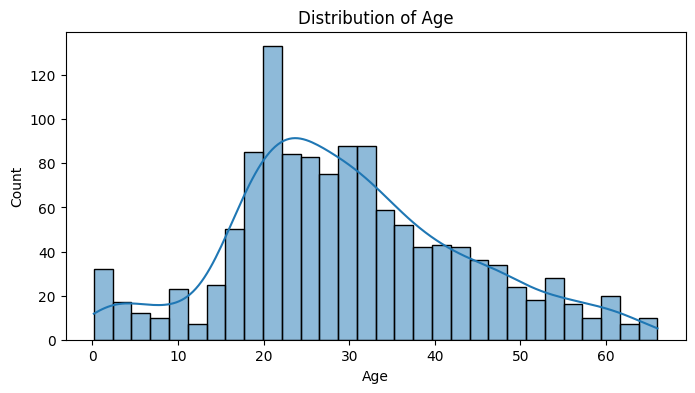

In [37]:
#Exploratory data analysis on age
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


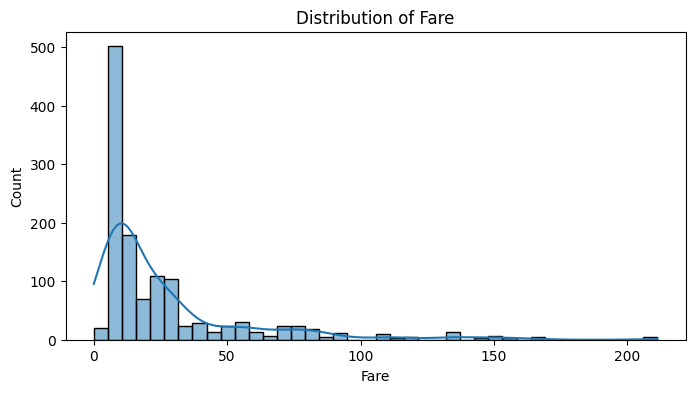

In [38]:
#Exploratory Data analysis on Fare
plt.figure(figsize=(8,4))
sns.histplot(df['fare'], bins=40, kde=True)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


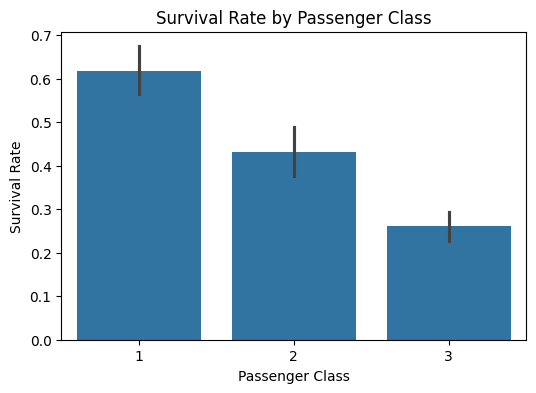

In [39]:
#EXploratory analysis on Passenger survival rate

plt.figure(figsize=(6,4))
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


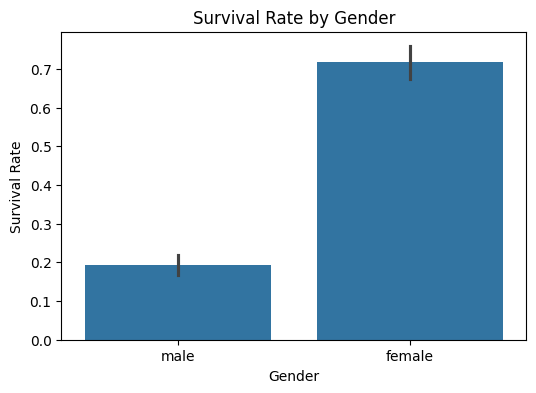

In [40]:
#Exploratory analysis on Survival Rate by gender

plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()
